# Fourier transformation and filtering

## Time series analysis

Import used python modules

In [8]:
import numpy as np #general matrices and numerics
import matplotlib.pyplot as plt #plotting tools

import pandas as pd #tables and dataframes
import scipy.signal #signal processing
import datetime #date-time formatting

# Chapter 1 - River levels

In [23]:
df = pd.read_csv('data\\Nordgraben-Eisenbahnbruecke.csv', sep =';', encoding='latin-1')

In [24]:
df.Datum=pd.to_datetime(df.Datum, format='%d.%m.%Y %H:%M')
df

,Datum,Einzelwert,Stationsnummer: 5867900,Stationsname: Eisenbahnbrücke,Gewässer: Nordgraben,Wasserstand in cm,Fehlwerte: -777
0,2022-05-08 00:00:00,72,NaN,NaN,NaN,NaN,NaN
1,2022-05-08 00:15:00,74,NaN,NaN,NaN,NaN,NaN
2,2022-05-08 00:30:00,75,NaN,NaN,NaN,NaN,NaN
3,2022-05-08 00:45:00,73,NaN,NaN,NaN,NaN,NaN
4,2022-05-08 01:00:00,70,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
35062,2023-05-08 05:30:00,63,NaN,NaN,NaN,NaN,NaN
35063,2023-05-08 05:45:00,67,NaN,NaN,NaN,NaN,NaN
35064,2023-05-08 06:00:00,70,NaN,NaN,NaN,NaN,NaN
35065,2023-05-08 06:15:00,72,NaN,NaN,NaN,NaN,NaN


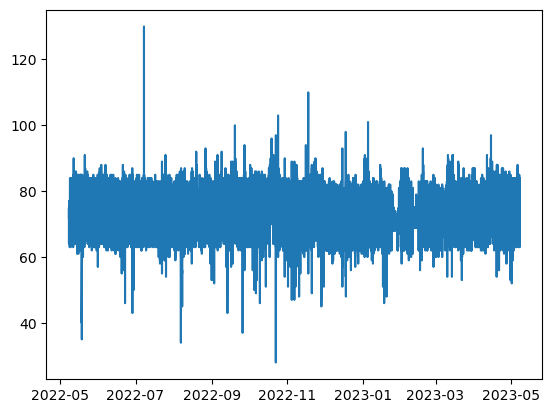

In [17]:
plt.plot(df.Datum,df.Einzelwert)

In [25]:
df2 = pd.read_csv('data\\Blankenfelde.csv', sep =';', encoding='latin-1')
df2.Datum=pd.to_datetime(df2.Datum, format='%d.%m.%Y %H:%M')
df2

,Datum,Einzelwert,Stationsnummer: 5867003,Stationsname: Blankenfelde,Gewässer: Blankenfelder Graben,Wasserstand in cm,Fehlwerte: -777
0,2022-05-08 00:00:00,101,NaN,NaN,NaN,NaN,NaN
1,2022-05-08 00:15:00,100,NaN,NaN,NaN,NaN,NaN
2,2022-05-08 00:30:00,99,NaN,NaN,NaN,NaN,NaN
3,2022-05-08 00:45:00,98,NaN,NaN,NaN,NaN,NaN
4,2022-05-08 01:00:00,98,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
35059,2023-05-08 04:00:00,84,NaN,NaN,NaN,NaN,NaN
35060,2023-05-08 04:15:00,82,NaN,NaN,NaN,NaN,NaN
35061,2023-05-08 04:30:00,79,NaN,NaN,NaN,NaN,NaN
35062,2023-05-08 04:45:00,77,NaN,NaN,NaN,NaN,NaN


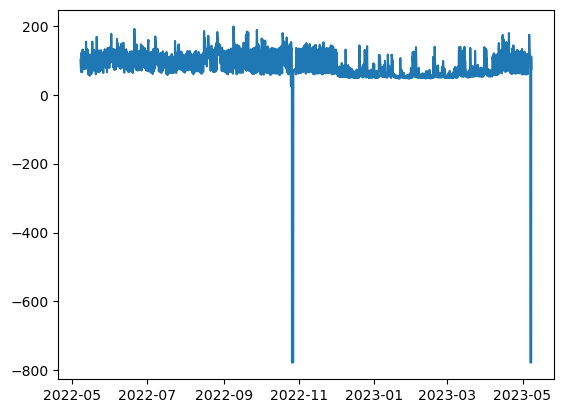

In [21]:
plt.plot(df2.Datum,df2.Einzelwert)

(array([19478., 19479., 19480., 19481., 19482., 19483., 19484., 19485.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

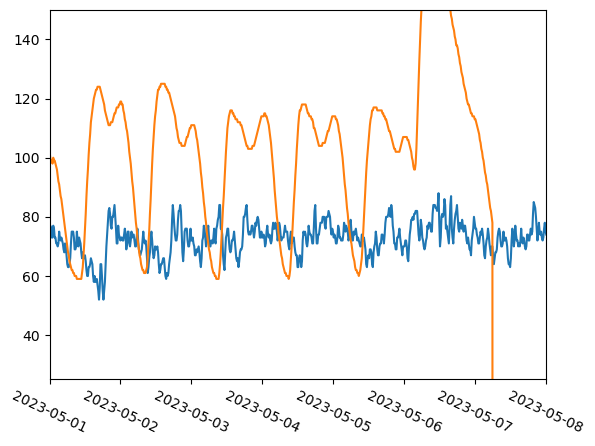

In [32]:
plt.plot(df.Datum,df.Einzelwert)
plt.plot(df2.Datum,df2.Einzelwert)
plt.xlim([datetime.datetime(2023,5,1),datetime.datetime(2023,5,8)])
plt.ylim([25,150])
plt.xticks(rotation = -25)

Research questions:
1. can we link these two curves together?
2. what is the distance between the two stations (in time)?

# Chapter 2 - Fourier transformation principles 

In physics and mathematics, the Fourier transform (FT) is a transform that converts a function into a form that describes the frequencies present in the original function. The output of the transform is a complex-valued function of frequency. The term Fourier transform refers to both this complex-valued function and the mathematical operation. (source: wiki)

### Part 1 - Everything is harmonic


$f_i = a sin(bt+p)$

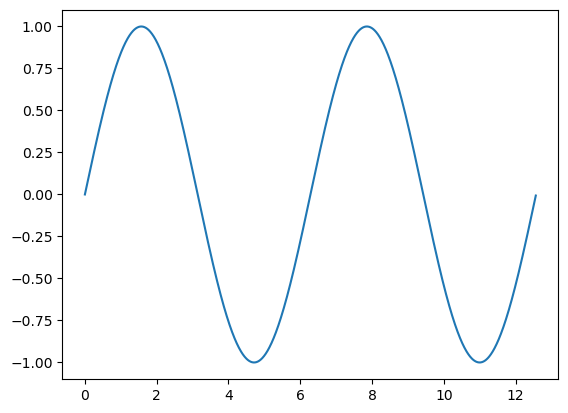

In [37]:
t1 = np.arange(0,4*np.pi,0.01)
f1 = np.sin(t1)
plt.plot(t1,f1)

We can mix and combine different harmonic functions to get any function shape

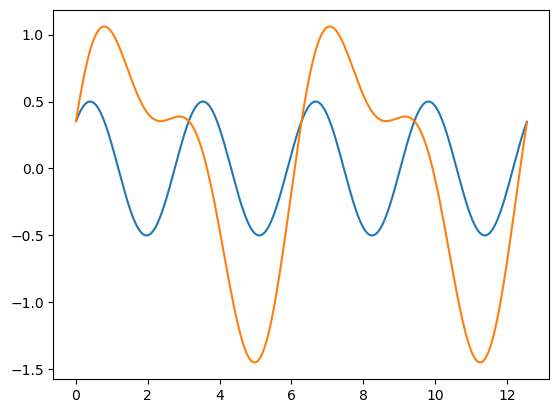

In [40]:
f2 = 0.5 * np.sin(2*t1+np.pi/4)
plt.plot(t1,f2)
plt.plot(t1,f1+f2)

The decomposition of a function into harmonics is called Fourier series


$s(x) \sim A_0 + \sum_{n=1}^{\infty} A_n cos((2\pi nx)/P)+ \sum_{n=1}^{\infty} B_n sin((2\pi nx)/P)$


wavelength ($\lambda$) P/n 

frequency  ($\nu$) n/P


### Part 2 - the frequency space

In [45]:
from scipy.fft import fft, ifft, fftfreq

(0.0, 1000.0)

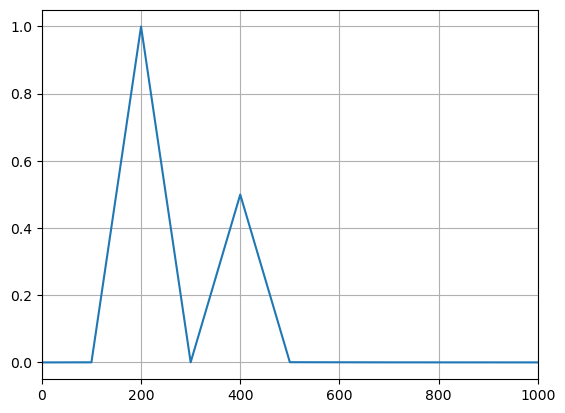

In [65]:
# Number of sample points

N = len(f2)

# sample spacing

T = 0.01/len(f2)
yf = fft(f1+f2)

xf = fftfreq(N, T)[:N//2]


plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.xlim([0,1000])


# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

### Intermission - what is noise?

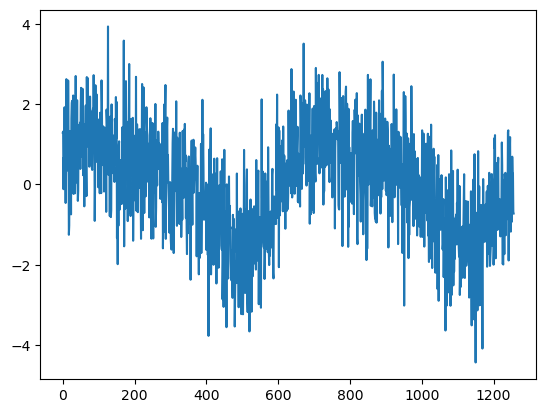

In [85]:
plt.plot(f1+f2+1*np.random.normal(0,1,len(f1)))

(0.0, 10.0)

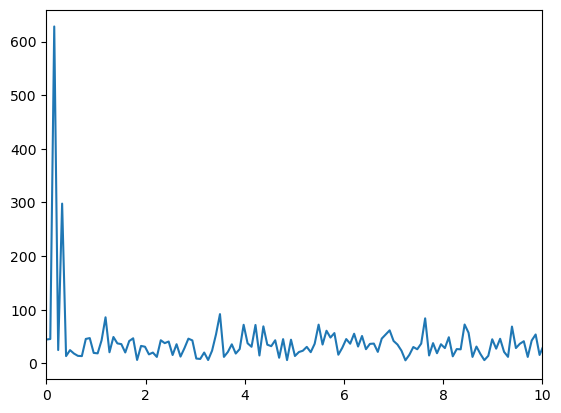

In [93]:

# Number of samples in normalized_tone
N = len(f1)

yf = fft(f1+f2+1*np.random.normal(0,1,len(f1)))[:N//2]
xf = fftfreq(N, 0.01)[:N//2]

plt.plot(xf, np.abs(yf))
plt.xlim([0,10])

White noise have all frequencies in it.

## Part 3 - Can we remove the noise?

In [97]:
f3 = f1+f2+1*np.random.normal(0,1,len(f1))

yf = fft(f3)

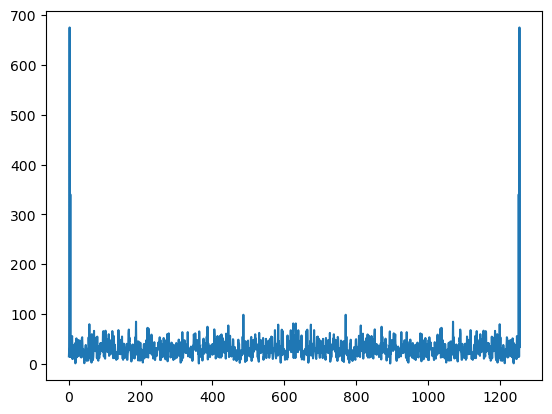

In [99]:
plt.plot(abs(yf))

C:\Users\Mark\anaconda3\envs\pymc_env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


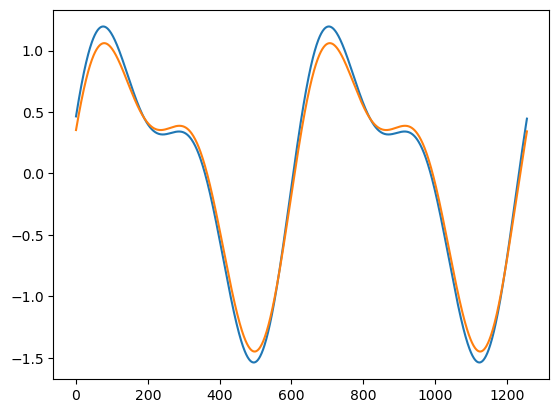

In [103]:
#Naive approach
yf[np.where(abs(yf)<100)] = 0
plt.plot(ifft(yf))
plt.plot(f1+f2)

Issues:
1. sharp cuts not preferred - everything is with harmonic functions
2. what happens with the phases?



we use proper filters instead

## Chapter 3 - Real data

(array([19454., 19455., 19456., 19457., 19458., 19459., 19460., 19461.,
        19462.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

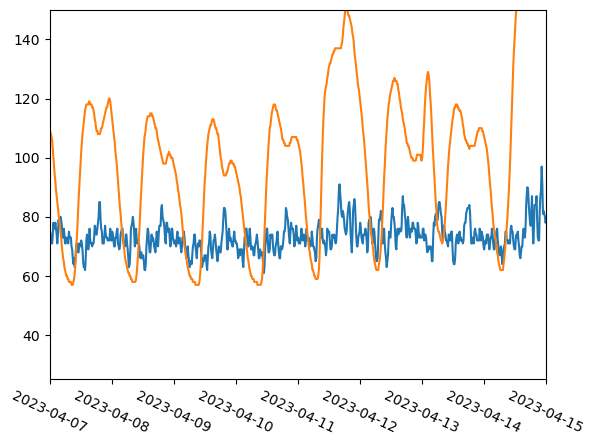

In [106]:
plt.plot(df.Datum,df.Einzelwert)
plt.plot(df2.Datum,df2.Einzelwert)
plt.xlim([datetime.datetime(2023,4,7),datetime.datetime(2023,4,15)])
plt.ylim([25,150])
plt.xticks(rotation = -25)

In [113]:
NGf = fft(df.Einzelwert)
NGx = fftfreq(len(df.Einzelwert),15)

C:\Users\Mark\AppData\Local\Temp\ipykernel_9552\1157574635.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/NGx/60,abs(NGf))


Text(0.5, 0, 'Period [h]')

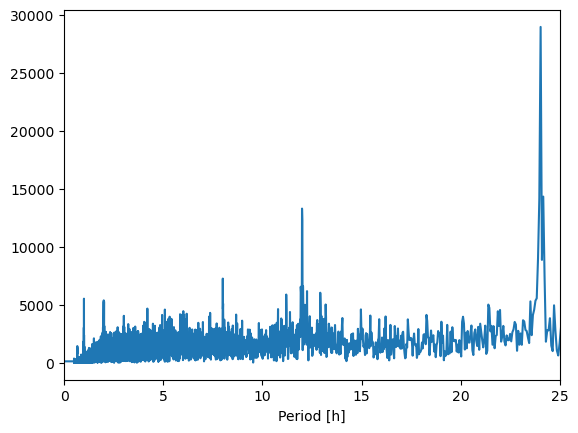

In [140]:
plt.plot(1/NGx/60,abs(NGf))
plt.xlim([0,25])
plt.xlabel('Period [h]')

In [121]:
Bf = fft(df2.Einzelwert)
Bx = fftfreq(len(df2.Einzelwert),15)

C:\Users\Mark\AppData\Local\Temp\ipykernel_9552\2583784376.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/Bx/60,abs(Bf))


Text(0.5, 0, 'Period [h]')

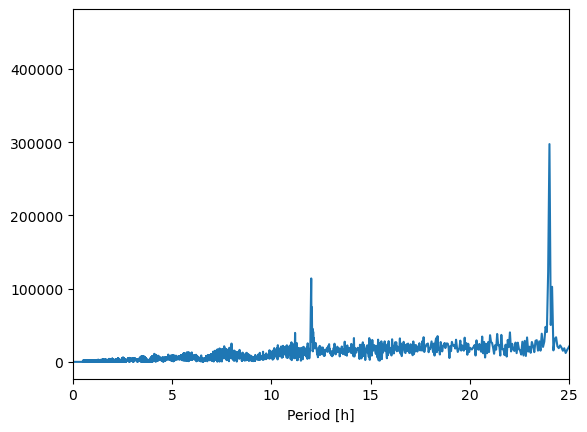

In [139]:
plt.plot(1/Bx/60,abs(Bf))
plt.xlim([0,25])
plt.xlabel('Period [h]')

In [157]:
#naive once more
NGf2 = np.copy(NGf)
NGf2[np.where(NGf2<2000)]=0

C:\Users\Mark\AppData\Local\Temp\ipykernel_9552\2794447112.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/NGx/60,abs(NGf2))


Text(0.5, 0, 'Period [h]')

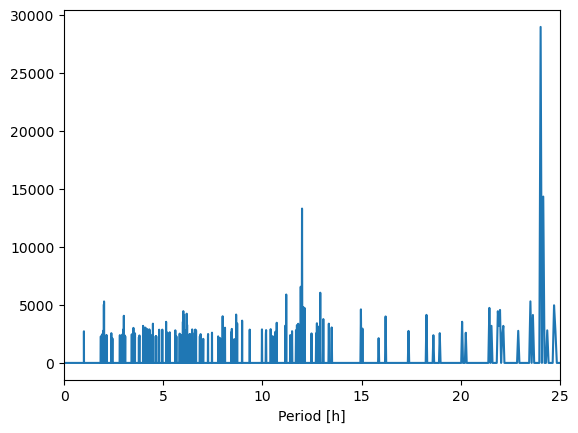

In [158]:
plt.plot(1/NGx/60,abs(NGf2))
plt.xlim([0,25])
plt.xlabel('Period [h]')

C:\Users\Mark\anaconda3\envs\pymc_env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(array([19454., 19455., 19456., 19457., 19458., 19459., 19460., 19461.,
        19462.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

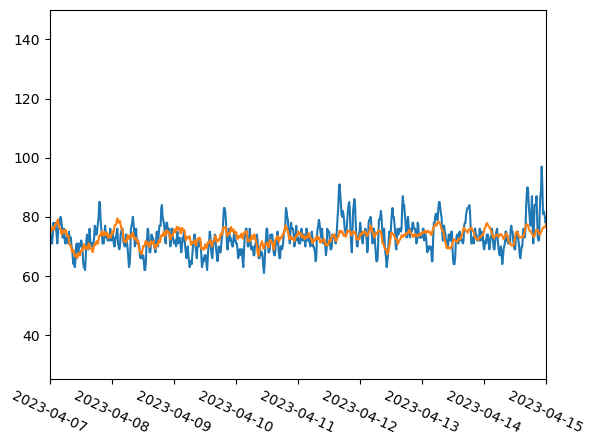

In [159]:
plt.plot(df.Datum,df.Einzelwert)
plt.plot(df.Datum,ifft(NGf2))
plt.xlim([datetime.datetime(2023,4,7),datetime.datetime(2023,4,15)])
plt.ylim([25,150])
plt.xticks(rotation = -25)

Butterworth filter

In [302]:
# Butterworth filter
b, a = scipy.signal.butter(8, 0.01 ,btype = 'low', analog = False)
w, h = scipy.signal.freqs(b, a)
NG_f = scipy.signal.filtfilt(b,a,df.Einzelwert)

C:\Users\Mark\AppData\Local\Temp\ipykernel_9552\3309586093.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/NGx/60,abs(fft(NG_f)))


(0.0, 50.0)

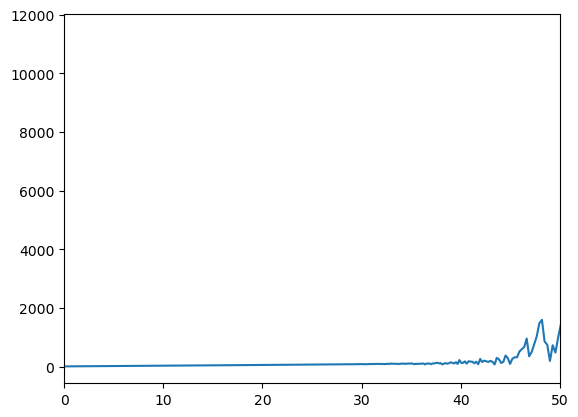

In [303]:
plt.plot(1/NGx/60,abs(fft(NG_f)))
plt.xlim([0,50])

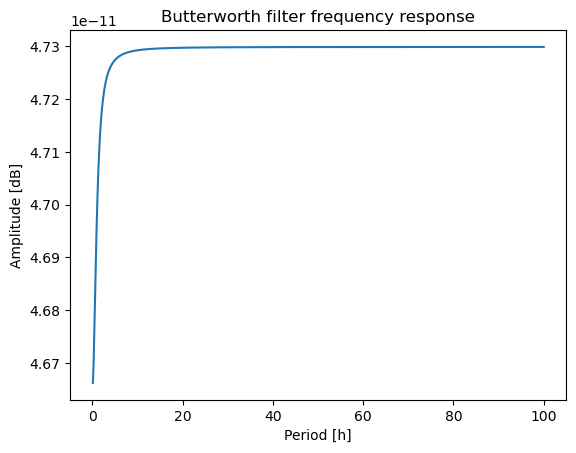

In [313]:

#plt.semilogx(1/w/60, 20 * np.log10(abs(h)))
#plt.semilogx(1/w, h)
plt.plot(1/w,abs(h))
plt.title('Butterworth filter frequency response')
plt.xlabel('Period [h]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
#plt.axvline(0.01*60, color='green') # cutoff frequency
plt.show()

In [192]:
60*385

23100

(array([19454., 19455., 19456., 19457., 19458., 19459., 19460., 19461.,
        19462.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

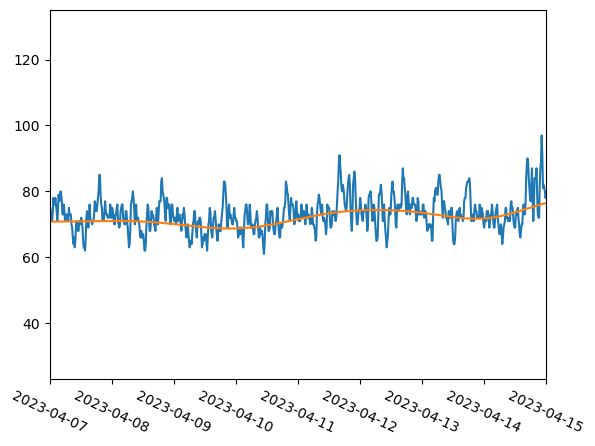

In [305]:
plt.plot(df.Datum,df.Einzelwert)
plt.plot(df.Datum,NG_f)
plt.xlim([datetime.datetime(2023,4,7),datetime.datetime(2023,4,15)])
#plt.ylim([25,150])
plt.xticks(rotation = -25)

## Bandpass filter

In [353]:
b, a = scipy.signal.butter(8, [0.02,0.1] ,btype = 'bandpass', analog = False, fs = 1)
w, h = scipy.signal.freqs(b, a)
NG_f = scipy.signal.filtfilt(b,a,df.Einzelwert)

Text(0.5, 1.0, 'Butterworth filter frequency response')

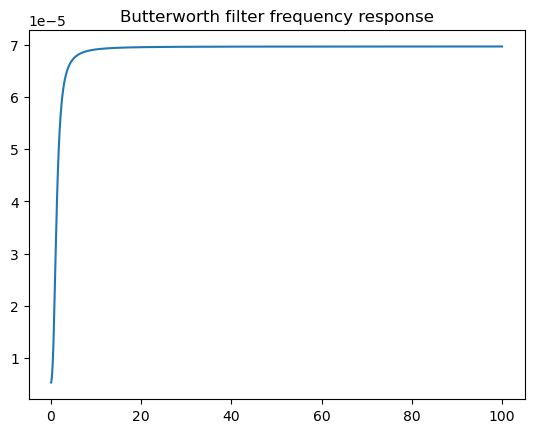

In [354]:
plt.plot(1/w,abs(h))
plt.title('Butterworth filter frequency response')



C:\Users\Mark\AppData\Local\Temp\ipykernel_9552\3309586093.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/NGx/60,abs(fft(NG_f)))


(0.0, 50.0)

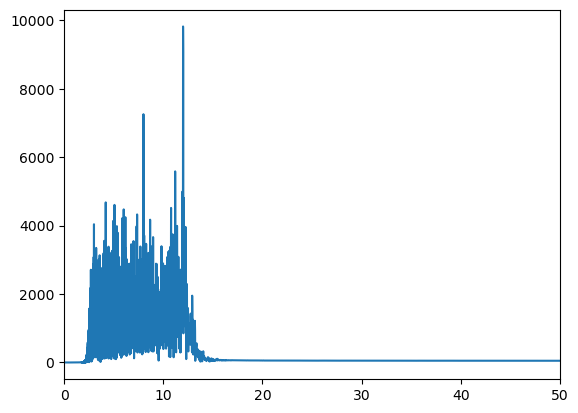

In [355]:
plt.plot(1/NGx/60,abs(fft(NG_f)))
plt.xlim([0,50])

(array([19454., 19455., 19456., 19457., 19458., 19459., 19460., 19461.,
        19462.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

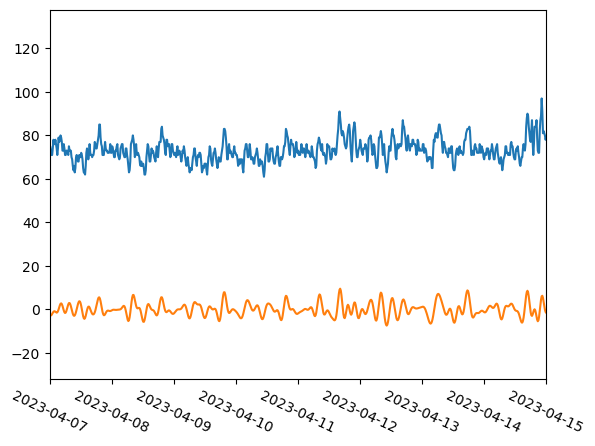

In [356]:
plt.plot(df.Datum,df.Einzelwert)
plt.plot(df.Datum,NG_f)
plt.xlim([datetime.datetime(2023,4,7),datetime.datetime(2023,4,15)])
#plt.ylim([25,150])
plt.xticks(rotation = -25)